In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from os import path
# sys.path.append(path.abspath('/Users/mingxidai/Documents/project/trajectory-search'))
sys.path.append('/Users/mingxidai/Documents/project/trajectory-search/src/features')
from build_bbox import *

# Read in trajectory data

### specify data and top k

In [116]:
query = 'gps_20161003_trajectory'
train = 'gps_20161002_trajectory'
query_num=50

### load data

In [47]:
query_path = '../data/processed/%s.txt' % query
train_path = '../data/processed/%s.txt' % train
query_id_dict_path = '../data/interim/%s/%s/query_id_dict.txt' % (query, train)
rtree_id_dict_path = '../data/interim/%s/rtree_id_dict.txt' % train

In [35]:
query_id_dict = read_pickle(query_id_dict_path)
query_id_dict = {v: k for k, v in query_id_dict.items()} 
query_id_dict

../data/interim/gps_20161003_trajectory/gps_20161002_trajectory/query_id_dict.txt


{1: '1040904b87fe12ec86c8c2622c95ff81',
 35: 'b88f20ad0a48e6baff081a54a49e5b80',
 27: 'a1bb01a6db219c5dc3a1fe44fd215119',
 40: 'c2ee4e8509971091a8054f97d9a53503',
 20: '68937a75733cce54f178c04d32254f1e',
 12: '57519faa32027fe5a10088aea9417463',
 24: '97de19db06651a31ec90ea38b058fd35',
 46: 'eab14eb00d5d1c592cccdc01a0da355d',
 26: '9a45fd37da43d94cb0b42843df5c035c',
 14: '588ff58e9b22a97b28950740e45b9da2',
 11: '529eb89cda5110cb792c3efe498e157c',
 13: '5854ff08676fbd89069bd9e6a37bd065',
 23: '94f21b045bf007a3d177c476096f2c49',
 44: 'e8b829366fcaee4b2c152538dc60d9bb',
 45: 'e92073d6631768eec6e569ef14d8c847',
 17: '62f977ff4164f003cc3f4feb9e8bfcd9',
 43: 'daffdbef0c99b29d65839f6836eb17be',
 8: '2d2323a6a37ee7af71769fd18c6598e8',
 47: 'edde72691118837f0e9b6e2b5347a7e5',
 30: 'adb10acc573758f66850e88124f0ccd7',
 4: '22a2590c80df9c3e172361aa51dffde1',
 2: '12d48e28ee8c288275ba003ec07f470d',
 48: 'f084e4f89191b17923eef73117098093',
 33: 'b2af4a0472d617de68fbd7092de16921',
 36: 'bccb9f67e84726

In [34]:
train_id_dict = read_pickle(rtree_id_dict_path)
train_id_dict

../data/interim/gps_20161002_trajectory/rtree_id_dict.txt


{0: '00005afe7a74bffce9b57ddbf5ad705e',
 1: '0001416e564707c1de5c7be2f67bb329',
 2: '00014d9089d1bcca19739d72d187410b',
 17458: '34985eeabc2f46363b8c74b909c00728',
 4: '0002654bd3b5dd573625dba8ff338bc4',
 5: '00031c6c8d05c155481e7c50c6adb9b3',
 '6b78368496a7044ec74a1220d18a9a58': 35336,
 7: '00040a237fe55de1fbe83297da0760fe',
 8: '00040a897788d7783800870a879c6431',
 9: '000497cca9408977b4972c244315008a',
 10: '0004a808a5b76e2992a6c74eacea5b0b',
 11: '0004cf1bc3f3fa55e49b492ca3b584d0',
 'b7b3a636da774d5ada2d9029dd67af2a': 60447,
 13: '00074547a66cf9fc03cd39475b7ccc02',
 '355ffcd881be8bf94fc4cf859dfbb0eb': 17718,
 15: '00086e3ae6ec633a05c2c5695cd05bd3',
 16: '000d83888ca43f7f3bd400c0999ded1e',
 '3bd00a02020e9e9e342c730276183a87': 19859,
 'dfafeb8f5f7ad05e0475fbc183d9ee42': 73681,
 19: '0010532c276c6e9c21d260783f9f2d82',
 20: '00105c3ab04dd1ba2dae2668c71ab28d',
 21: '001068001d9f42cdbdeaa2310f93cdb1',
 22: '0010fff8a4ff704828e73252f44b72ca',
 23: '001303ba0f21fb89e0b4fa41b780a095',
 24: '

In [36]:
query_data = load_trajectory(query_path, n=query_num)
query_data

In [37]:
train_data = load_trajectory(train_path)
train_data

{'5854ff08676fbd89069bd9e6a37bd065': [(108.95376, 34.23912),
  (108.95376, 34.23912),
  (108.95376, 34.23912),
  (108.95376, 34.23912),
  (108.95387, 34.23904),
  (108.95387, 34.23904),
  (108.95387, 34.23904),
  (108.95387, 34.23904),
  (108.95387, 34.2391),
  (108.95387, 34.23922),
  (108.95387, 34.23935),
  (108.95387, 34.23949),
  (108.95387, 34.23967),
  (108.95387, 34.23984),
  (108.95387, 34.24003),
  (108.95388, 34.2402),
  (108.95388, 34.24032),
  (108.95388, 34.24046),
  (108.95388, 34.24062),
  (108.95388, 34.24078),
  (108.95388, 34.24088),
  (108.95388, 34.24096),
  (108.95388, 34.24096),
  (108.95408, 34.24107),
  (108.95421, 34.24107),
  (108.95439, 34.24107),
  (108.95462, 34.24107),
  (108.95487, 34.24107),
  (108.95514, 34.24107),
  (108.95542, 34.24107),
  (108.9557, 34.24107),
  (108.95595, 34.24107),
  (108.95619, 34.24108),
  (108.95643, 34.24108),
  (108.95654, 34.24109),
  (108.95676, 34.24109),
  (108.95685, 34.24109),
  (108.95706, 34.2411),
  (108.95727, 34.2

### Specify query trajectory

In [169]:
query_key = '16'
top_k=10
result_path = '../data/result/%s/%s/query_%s.txt' % (query, train, query_key)
truth_path = '../data/truth/%s/%s/query_%s.txt' % (query, train, query_key)

In [170]:
result_top_k = load_top_k(result_path, k=top_k)
result_top_k

[16937, 24166, 74575, 13799, 31361, 10717, 27826, 54971, 22823, 49450]

In [171]:
truth_top_k = load_top_k(truth_path, k=top_k)
truth_top_k

[16937, 12263, 65378, 81610, 2895, 24166, 74575, 13799, 66958, 34616]

In [172]:
acc = sum([int(e in truth_top_k) for e in result_top_k])/len(result_top_k)
print('accuracy of top %d is: %d%%' %(top_k, acc*100))

accuracy of top 10 is: 40%


# Plot Qgramk-NNIndex top K

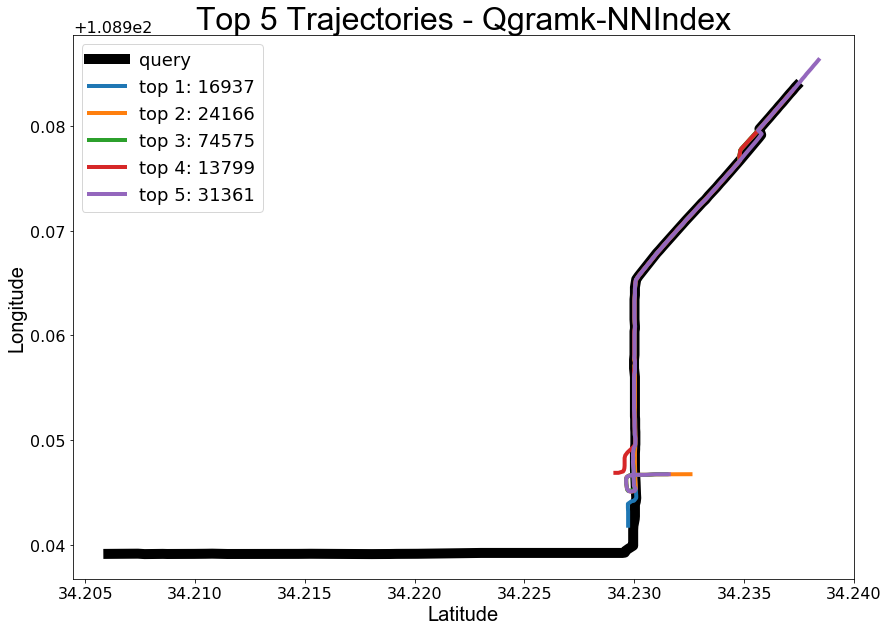

In [158]:
axis_font = {'fontname':'Arial', 'size':'20'}
title_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'size':'18'}
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(14,10)) 
traj_x, traj_y = build_coordinate(query_id_dict[int(query_key)], query_data)
plt.plot(traj_x, traj_y, color = 'black', linewidth=10, label = 'query')
for i in range(top_k):
    key = result_top_k[i]
    traj_x, traj_y = build_coordinate(train_id_dict[key], train_data)
    plt.plot(traj_x, traj_y, linewidth=4, label= 'top %s: %s' % (str(i+1), key))
plt.legend(prop=legend_font)
plt.title('Top %s Trajectories - Qgramk-NNIndex' % top_k, **title_font)
plt.xlabel('Latitude', **axis_font)
plt.ylabel('Longitude', **axis_font)
plt.show()

# Plot ground truth top K

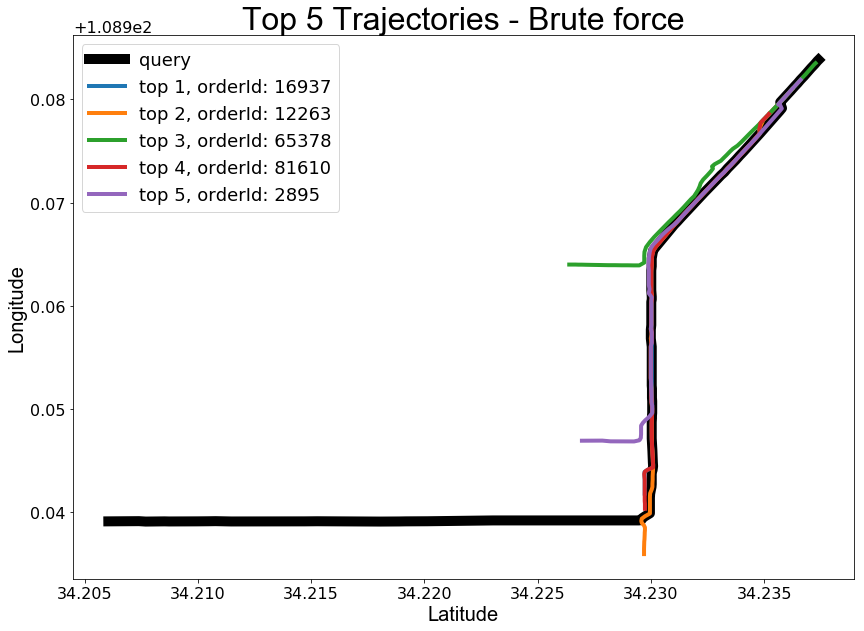

In [159]:
axis_font = {'fontname':'Arial', 'size':'20'}
title_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'size':'18'}
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(14,10)) 
traj_x, traj_y = build_coordinate(query_id_dict[int(query_key)], query_data)
plt.plot(traj_x, traj_y, color = 'black', linewidth=10, label = 'query')
for i in range(top_k):
    key = truth_top_k[i]
    traj_x, traj_y = build_coordinate(train_id_dict[key], train_data)
    plt.plot(traj_x, traj_y, linewidth=4, label= 'top %s, orderId: %s' % (str(i+1), key))
plt.legend(prop=legend_font)
plt.title('Top %s Trajectories - SequentialScan' % top_k, **title_font)
plt.xlabel('Latitude', **axis_font)
plt.ylabel('Longitude', **axis_font)
plt.show()